In [1]:
#data format library
import h5py
#numpy
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
# %matplotlib notebook
from sklearn.cluster import KMeans

import sys
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import os
from scipy.integrate import odeint
sys.path.append('/Users/costa/Repositories/max_pred_states_repo+data/maximally_predictive_states/utils')
import operator_calculations as op_calc
import stats

In [2]:
#change path to where 'manuscript_data' is saved
dir_path = '/Users/costa/Repositories/max_pred_states_repo+data/manuscript_data/'

In [5]:
f = h5py.File(dir_path+'KS_entropy/Rossler_choice_dt/combined_entropy_results_errorbars.h5','r')
h_dt_K_N = np.array(f['h_source'])
h_dt_x_K_N = np.array(f['h_source_x'])
h_dt_embed_K_N = np.array(f['h_embed'])
K_range = np.array(f['K_range'],dtype=int)
cluster_range = np.array(f['cluster_range'],dtype=int)
dt_range = np.array(f['dt_range'])
T= np.array(f['T'],dtype=int)[0]
a,b,c = np.array(f['a,b,c']) 
f.close()

In [7]:
colors_K = plt.cm.viridis(np.linspace(0,1,len(K_range)))

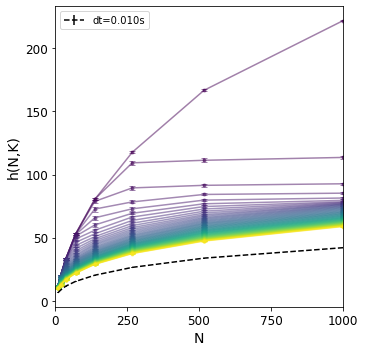

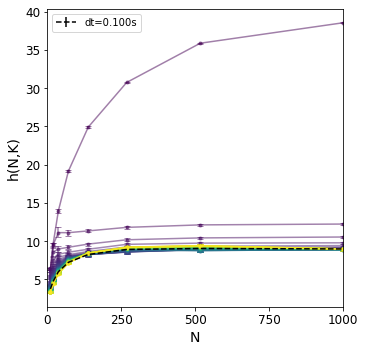

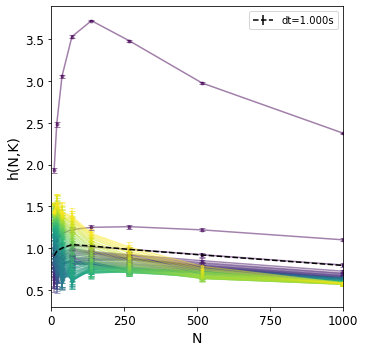

In [11]:
for dt_idx in [0,2,4]:
    plt.figure(figsize=(5,5))
    dt = dt_range[dt_idx]
    for k_idx,K in enumerate(K_range):
        mean = np.mean(h_dt_embed_K_N[dt_idx,k_idx]/dt,axis=1)
        cil = np.percentile(h_dt_embed_K_N[dt_idx,k_idx]/dt,2.5,axis=1)
        ciu = np.percentile(h_dt_embed_K_N[dt_idx,k_idx]/dt,97.5,axis=1)
    #         plt.plot(cluster_range,mean,c=colors_K[k_idx],marker='o',alpha=.5)
    #         plt.fill_between(cluster_range,cil,ciu,color=colors_K[k_idx],alpha=.3)
        plt.errorbar(cluster_range,mean,yerr = [mean-cil,ciu-mean],marker='o',ms=3,capsize=3,c=colors_K[k_idx],alpha=.5)
    mean = (h_dt_K_N[dt_idx,0]/dt).mean(axis=1)
    cil = np.percentile(h_dt_K_N[dt_idx,0]/dt,2.5,axis=1)
    ciu = np.percentile(h_dt_K_N[dt_idx,0]/dt,97.5,axis=1)
    plt.errorbar(cluster_range,mean,yerr = [mean-cil,ciu-mean],ls='--',c='k',label='dt={:.3f}s'.format(dt_range[dt_idx]))
    plt.legend()
    plt.xlabel('N',fontsize=14)
    plt.ylabel('h(N,K)',fontsize=14)
    plt.xticks(np.arange(0,1001,250))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.xlim(0,1000)
    # plt.savefig('h_K_N_dt_idx_{}.pdf'.format(dt_idx))
    plt.show()

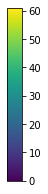

In [12]:
a = np.array([[0,1]])
plt.figure(figsize=(.25, 4))
img = plt.imshow(a, cmap="viridis",vmin=0,vmax=K_range[-1]+1)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
# plt.axhline(12,c='k')
plt.colorbar(cax=cax)
# plt.savefig("colorbar_Krange.pdf")

In [13]:
h_embed_dt_K = h_dt_embed_K_N[:,:,:,-1]

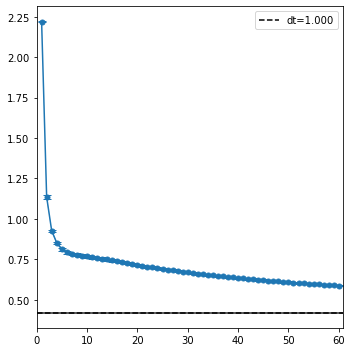

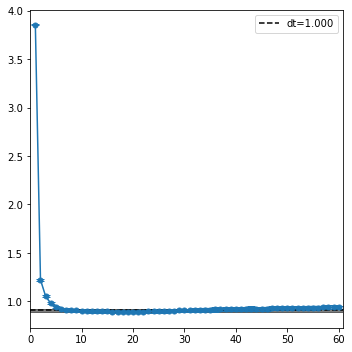

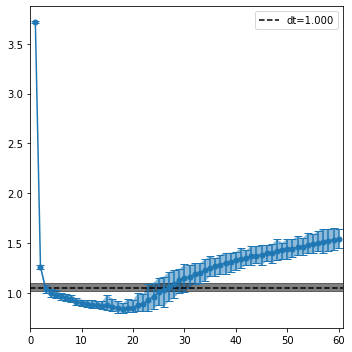

In [14]:
for dt_idx in [0,2,4]:
#     dt = dt_range[dt_idx]
    plt.figure(figsize=(5,5))
    mean = (h_dt_embed_K_N[dt_idx,:].max(axis=1)/dt).mean(axis=1)
    cil = np.percentile(h_dt_embed_K_N[dt_idx,:].max(axis=1)/dt,2.5,axis=1)
    ciu = np.percentile(h_dt_embed_K_N[dt_idx,:].max(axis=1)/dt,97.5,axis=1)
    plt.errorbar(K_range*dt,mean,yerr = [mean-cil,ciu-mean],marker='o',capsize=4,ms=5)
    plt.fill_between(K_range*dt,cil,ciu,alpha=.5)
    mean = (h_dt_K_N[dt_idx,0].max(axis=0)/dt).mean()
    cil = np.percentile(h_dt_K_N[dt_idx,0].max(axis=0)/dt,2.5)
    ciu = np.percentile(h_dt_K_N[dt_idx,0].max(axis=0)/dt,97.5)
    plt.axhline(mean,ls='--',c='k',label='dt={:.3f}'.format(dt))
    plt.axhspan(cil,ciu,color='k',alpha=.5)
    plt.xlim(0,1.015*K_range[-1]*dt)
    plt.tight_layout()
    plt.legend()
#     plt.savefig('h_K_dt_idx_max_{}.pdf'.format(dt_idx))
    plt.show()

# fetch relevant time scales

In [22]:
f = h5py.File(dir_path+'KS_entropy/Rossler_choice_dt/relevant_tscales.h5','r')
ct_ci = np.array(f['ct_ci'])
lt_ci = np.array(f['ltau_ci'])
f.close()

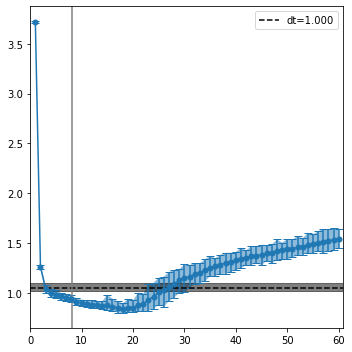

In [23]:
dt_idx=4
dt= dt_range[dt_idx]
plt.figure(figsize=(5,5))
mean = (h_dt_embed_K_N[dt_idx,:].max(axis=1)/dt).mean(axis=1)
cil = np.percentile(h_dt_embed_K_N[dt_idx,:].max(axis=1)/dt,2.5,axis=1)
ciu = np.percentile(h_dt_embed_K_N[dt_idx,:].max(axis=1)/dt,97.5,axis=1)
plt.errorbar(K_range*dt,mean,yerr = [mean-cil,ciu-mean],marker='o',capsize=4,ms=5)
plt.fill_between(K_range*dt,cil,ciu,alpha=.5)
mean = (h_dt_K_N[dt_idx,0].max(axis=0)/dt).mean()
cil = np.percentile(h_dt_K_N[dt_idx,0].max(axis=0)/dt,2.5)
ciu = np.percentile(h_dt_K_N[dt_idx,0].max(axis=0)/dt,97.5)
plt.axhline(mean,ls='--',c='k',label='dt={:.3f}'.format(dt))
plt.axhspan(cil,ciu,color='k',alpha=.5)
plt.xlim(0,1.015*K_range[-1]*dt)
plt.axvline(lt_ci[0],c='gray')
plt.tight_layout()
plt.legend()
# plt.savefig('h_K_dt_idx_max_{}_with_mix_time.pdf'.format(dt_idx))
plt.show()

In [24]:
ct_ci

array([1.6147   , 1.6138   , 1.6156524], dtype=float32)

In [25]:
lt_ci

array([8.168682, 8.024879, 8.298283], dtype=float32)